### Submitted by Brian Camp

original file name:<br>
`sliderule_dsi_inferential_statistics_exercise_1.ipynb`

# $\S$8-3-1 What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal? 
<ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
</ul>

<b><u>Answer:</u></b>

To determine if the distribution is normal, both graphical evidence and a $p$-value from the Anderson-Darling test will be considered.

The quickest graphical evidence to check is the histogram of the data. This is done below using the `plt.hist()` command with a range of bin sizes to avoid any potential binning bias (i.e. potentially misrepresenting the distribution due to the bin size being chosen).

In [3]:
sns.set() # setting seaborn styling

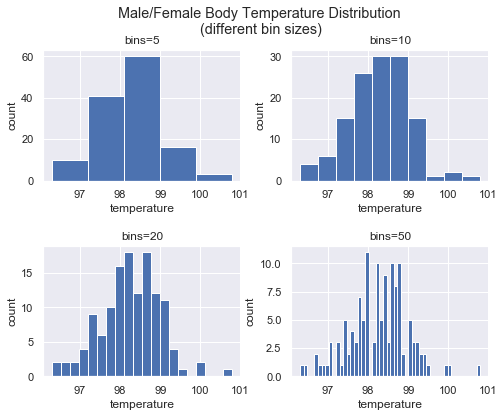

In [4]:
# Combined data for male/female measurements
binlist=[5,10,20,50]

plt.subplots(2,2,figsize=(8,6));
for (pos,num) in enumerate(binlist):
    plt.subplot(2,2,pos+1)
    plt.hist(x='temperature',data=df,bins=num)
    plt.xlabel('temperature')
    plt.ylabel('count')
    plt.title('bins={:d}'.format(num))

plt.subplots_adjust(hspace=0.5,wspace=0.25)
plt.suptitle('Male/Female Body Temperature Distribution\n (different bin sizes)')
plt.show()

<b>The histogram of the temperature appears to be approximately normal.</b>

Other visual ways to compare the data include comparing the empirical CDF of the data to the normal distribution and showing the qq-plot of the data compared with the normal distribution (i.e. how do quantiles of the distribution match up with the quantiles of the normal distribution).

For the normal distribution below, the functions used are `stats.norm.cdf()` and `sm.graphics.qqplot`.

The function `ecdf()` function defined below will give the empirical CDF for a list of data which can then be plotted using `plt.plot()`.

In [5]:
def ecdf(data):
    # number of data points
    n = len(data)
    
    # x-values: sorted data
    x = np.sort(data)
    
    # y-values: percentiles
    y = np.arange(1, n + 1)/n
    
    return x, y

The empirical CDF of the data compared to the normal distribution.

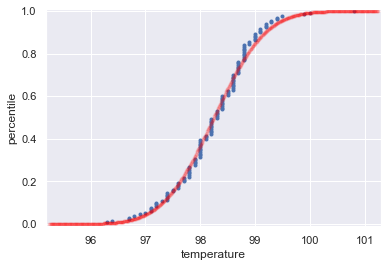

In [6]:
x, y = ecdf(df.temperature)

xbar = df.temperature.mean()
sx = df.temperature.std()

#x1, y1 = ecdf(np.random.normal(loc=xbar, scale=sx, size=df.temperature.size))
xnorm = xbar + np.arange(-3,3,0.01)
ynorm = stats.norm.cdf(x =xnorm, loc=xbar, scale=sx)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('temperature')
plt.ylabel('percentile')

plt.plot(xnorm, ynorm,marker='.', linestyle='none', color='red', alpha=0.125)
plt.margins(0.01)
plt.show()

A qq-plot of the data versus the normal distribution.

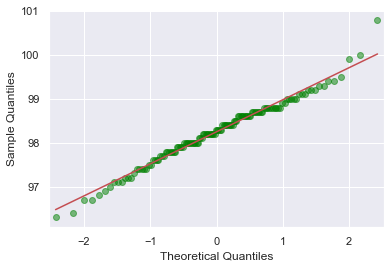

In [7]:
sm.graphics.qqplot(df.temperature, line='s', color='green', alpha=0.5);

Anderson-Darling Test for Normality: Body Temperature

In [8]:
# overall
sm.stats.diagnostic.normal_ad(df.temperature)

(0.5201038826714921, 0.18292460444352898)

Finally by the Anderson-Darling Tests, are p-values are all above 0.05, so we cannot reject the normality of the data (however, this test does not "prove" normality either).

When considered collectively with the visual evidence above, the distribution of body temperature appears to be normal.

## 2. Is the sample size large? Are the observations independent?
<ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>


<b><u>Answer:</u></b>
    
The sample size is 130 which is considered to be large (i.e. $n>30$) for the application of the Central Limit Theorem. The observations are also independent as each is taken from a separate person.
    
So since this distribution is large enough, its sample means will behave approximately normally due to the CLT. So it should be okay to use a $t-$test. A $z-$test may also give respectable results although the $t-$test will be more appropriate at smaller sample sizes.

## 3. Is the true population mean really 98.6 degrees F?

<ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
</ul>

First, a simple inspection of the summary statistic, mean, shows that the population mean for the body temperature may be below $98.6^{\circ}F$.

In [9]:
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()

print('The mean temperature of the data is temp = {:8.5f}'.format(temp_mean))
print('The standard deviation of the data is temp = {:6.5f}'.format(temp_std))

The mean temperature of the data is temp = 98.24923
The standard deviation of the data is temp = 0.73318


### Bootstrapping a confidence interval

Here we create 10000 bootstrap replicates of the sample mean by sampling from the data using the `np.random.choice()` function.

The function `bs_mean()` is defined to automate this process and then a loop is used to fill the values into the vector `bootstrap_means`.

In [10]:
def bs_mean(x, n=130):
    
    return np.random.choice(x, size=n).mean()

bootstrap_means = np.empty(10000) # create 10000 means by resampling the data

for i in range(10000):
    
    bootstrap_means[i] = bs_mean(df.temperature)
    

A 95% confidence interval using the bootstrap replicates provides some sense that the actual mean temperature from this data is unlikely (less than 5%) to be 98.6 degrees.

In [11]:
x1,x2=np.percentile(bootstrap_means, [2.5, 97.5])

print('[{:6.4f},{:6.4f}]'.format(x1,x2))

[98.1231,98.3777]


Here is the corresponding histogram of the sample means from the bootstrap replicates (i.e. the sample means calculated through the resampling process).

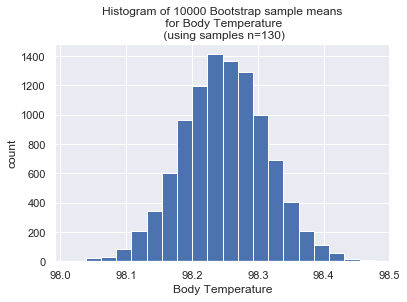

In [12]:
sns.set()
plt.hist(bootstrap_means,bins=20)
plt.xlabel('Body Temperature')
plt.ylabel('count')
plt.title('Histogram of 10000 Bootstrap sample means\n for Body Temperature\n (using samples n=130)')
plt.show();

While this is not a hypothesis test, the fact that our 95% confidence interval by bootstrapping does not contain the mean value of 98.6 suggests that this is not in fact the true mean value.

Next the hypothesis that the mean is 98.6 degrees is checked by bootstrapping. 

$H_{0}:\ \mu=98.6^{\circ}F$

The $p$-value for this test will assess the probability of obtaining a sample mean as extreme as the value that we obtained assuming that $H_{0}$ is true. If the $p$-value is very small, then this leads to the rejection of $H_{0}$ since it would be so unlikely to have obtained our result.

Bootstrapping the hypothesis test amounts to sampling from our distribution under the assumption that the null hypothesis is true. 

The null hypothesis in this case is that the true population mean for body temperature is 98.6F. 

To achieve this, we create a bootstrap sample from our $n=130$ samples and shift the data so that it has a mean equivalent to the null hypothesis and then determine how likely it is for any data to have a mean at least as extreme as our observed value from the original sample of $n=130$.

First we adjust the sample data so that its true mean is 98.6.

In [13]:
xtemp_mod = df.temperature - temp_mean + 98.6

In [14]:
# create 10000 means by resampling the data assuming h0 is true
bootstrap_means_h0 = np.empty(10000) 

for i in range(10000):
    
    bootstrap_means_h0[i] = bs_mean(xtemp_mod)

Now we count the results that are at least as extreme as our original mean value.

In [15]:
xbar0 = df.temperature.mean()
d = np.abs(98.6 - xbar0)

print('Counting values where mean < 98.6 - d or mean > 98.6 + d')
print('d = |98.6 - xbar| = |98.6 - {:6.4f}| = {:6.4f}'.format(xbar0, d))
print('So only values outside of the interval ({:6.4f},{:6.4f})'.format(98.6-d, 98.6+d))

Counting values where mean < 98.6 - d or mean > 98.6 + d
d = |98.6 - xbar| = |98.6 - 98.2492| = 0.3508
So only values outside of the interval (98.2492,98.9508)


In [16]:
sum(bootstrap_means_h0<98.6-d) + sum(bootstrap_means_h0>98.6+d)

0

Since there are no values more extreme then what we obtained, the $p$-value $\approx0$ meaning it is
essentially not possible for $H_{0}$ to be true and it would be rejected.

### T-test and Z-test

Next the hypothesis is tested using one-sample $t$ and $z$ tests.

It is appropriate to use $t$-test to test this Hypothesis. The underlying data appear to be normal but the standard deviation is unknown (we have a sample standard deviation which is not exactly the same thing).

Also, this is a one-sample test as we are only comparing the measured value (body temperature) from the one group (with $n=130$).

In [17]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The $z$-test can also be used. In this case the assumption is being made that since the sample size is large (i.e. $n=130$) enough then the sample standard deviation $s$ is close enough to the population standard deviation that it can be considered to be known.

In [18]:
import statsmodels.stats.weightstats

In [19]:
statsmodels.stats.weightstats.ztest(df.temperature, value=98.6, alternative='two-sided')

(-5.4548232923645195, 4.9021570141012155e-08)

In the both the $t$-test and $z$-test, the $p$-values obtained are very small so the null hypothesis that the mean temperature is 98.6 is rejected.

In the $z$-test, the $p$-value is smaller because the normal distribution typically has smaller tails than the $t$-distribution.

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
<ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
</ul>


98.48


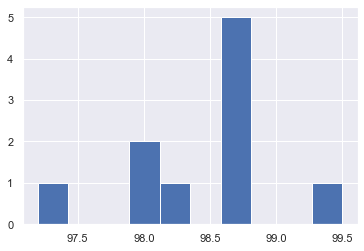

In [20]:
small_temp = np.random.choice(df.temperature, size=10)
plt.hist(small_temp)
print(small_temp.mean())

In [21]:
stats.ttest_1samp(small_temp, 98.6)

Ttest_1sampResult(statistic=-0.6123724356957458, pvalue=0.5554454421056163)

In [22]:
statsmodels.stats.weightstats.ztest(small_temp, value=98.6, alternative='two-sided')

(-0.612372435695746, 0.540291374607452)

In both of these cases, the $p$-value is not small enough to reject the null hypothesis. The $t$-test in particular has a larger $p$-value again because of the larger tails which is accentuated in this case by using a small sample size of $n=10$.

It is more important with smaller samples to use the $t$-test as the larger tails help account for not knowing the true standard deviation of the distribution.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
<ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
</ul>


From above, the bootstrap confidence interval we found was [98.1215, 98.3739]. Anything outside this interval would be considered abnormal.

In [23]:
x1,x2=np.percentile(bootstrap_means, [2.5, 97.5])

print('[{:6.4f},{:6.4f}]'.format(x1,x2))

[98.1231,98.3777]


### Using a $t$ confidence interval:

In [24]:
#stats.t.cdf and stats.t.ppf
#?stats.t.ppf

In [25]:
print(temp_mean)
print(temp_std)
sample_size=df.temperature.size
sample_size

98.24923076923078
0.7331831580389454


130

In [26]:
crit_t = abs(stats.t.ppf(0.025, df=sample_size-1))
print(crit_t)

xt1 = temp_mean - crit_t*temp_std/sample_size**0.5
xt2 = temp_mean + crit_t*temp_std/sample_size**0.5

print('({:f},{:f})'.format(xt1,xt2))

1.9785244914586055
(98.122003,98.376459)


### Using a $z$ confidence interval

In [27]:
#stats.norm.cdf and stats.norm.ppf
#?stats.norm.ppf

In [28]:
crit_z = abs(stats.norm.ppf(0.975))
print(crit_z)

E = crit_z*temp_std/sample_size**0.5

xz1 = temp_mean - E
xz2 = temp_mean + E

print('({:f},{:f})'.format(xz1,xz2))

1.959963984540054
(98.123196,98.375265)


## 6. Is there a significant difference between males and females in normal temperature?
<ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
</ul>

<b><u>Answer:</u></b><br>
First, we compare the temperatures for the different genders by looking at their summary statistics using `describe()` and some boxplots.

In [29]:
df.gender.value_counts()

F    65
M    65
Name: gender, dtype: int64

**Boxplots of Male and Female Temperature data for comparison**

**Summary of male (M) data**

In [30]:
df[df.gender=='M'].describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


**Summary of female (F) data**

In [31]:
df[df.gender=='F'].describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


From the summary statistics, it appears that the mean body temperature for females is higher than for males. We confirm this initial assessment visually using boxplots.

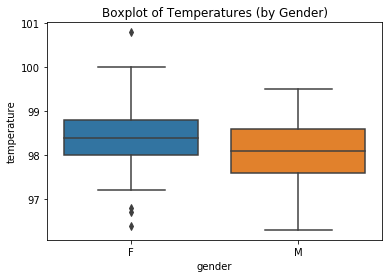

In [11]:
# need to label axes and title
#df.loc[:,['temperature']].plot(kind='box',by=df.gender);
sns.boxplot(y='temperature',x='gender',data=df)
plt.title('Boxplot of Temperatures (by Gender)')
plt.show()

Looking at the boxplots of the body temperatures by gender, it does appear that the female temperatures are a bit higher than the males.

Before running any tests, the normality of the data for the two genders is inspected. Since the overall data was found to be essentially normal before, here some histograms of the two genders are checked to confirm this result.

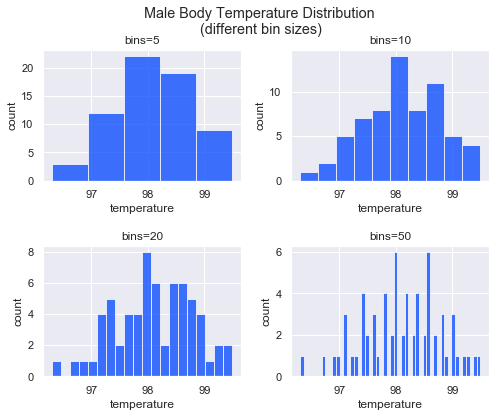

In [46]:
# data for male measurements only
plt.subplots(2,2,figsize=(8,6));
for (pos,num) in enumerate(binlist):
    plt.subplot(2,2,pos+1)
    plt.hist(x='temperature',data=df[df.gender=='M'],bins=num,alpha=0.75,color='#0044ff')
    #plt.hist(x='temperature',data=df[df.gender=='F'],bins=num,alpha=0.5,color='red')
    plt.xlabel('temperature')
    plt.ylabel('count')
    plt.title('bins={:d}'.format(num))

plt.subplots_adjust(hspace=0.5,wspace=0.25)
plt.suptitle('Male Body Temperature Distribution\n (different bin sizes)')
plt.show()

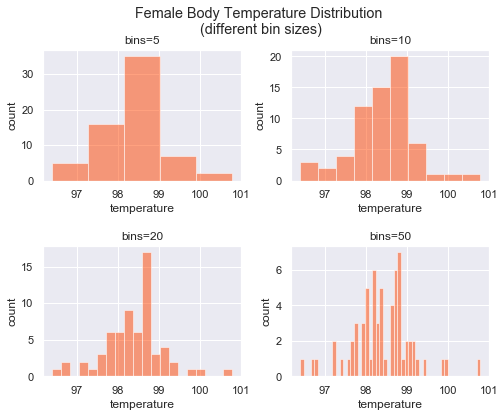

In [50]:
# data for female measurements only
plt.subplots(2,2,figsize=(8,6));
for (pos,num) in enumerate(binlist):
    plt.subplot(2,2,pos+1)
    #plt.hist(x='temperature',data=df[df.gender=='M'],bins=num,alpha=0.75,color='#0044ff')
    plt.hist(x='temperature',data=df[df.gender=='F'],bins=num,alpha=0.5,color='#ff4400')
    plt.xlabel('temperature')
    plt.ylabel('count')
    plt.title('bins={:d}'.format(num))

plt.subplots_adjust(hspace=0.5, wspace=0.25)
#plt.tight_layout() # sometimes works
plt.suptitle('Female Body Temperature Distribution\n (different bin sizes)')
plt.show()

The histograms of the separate male and female data appear to be normal or close to normal. This is confimred by the Anderson-Darling tests using `sm.stats.diagnostic.normal_ad()`.

In [27]:
# male data
sm.stats.diagnostic.normal_ad(df[df.gender=='M'].temperature)

(0.20825514476280205, 0.8592246616111768)

In [28]:
# female data
sm.stats.diagnostic.normal_ad(df[df.gender=='F'].temperature)

(0.6895675921648916, 0.06846020589810857)

In both gender cases, the $p$-value is **not** small enough (i.e. $<0.05$) to warrant rejecting the normality of the two distributions.

Also, it is safe to assume that the data are independent since there is no apparent relationship between the two sets of gender data.

Next, two sample $t$-tests are used to determine if they are the in fact different means.

More precisely, the $p$-value of the $t$-test will help determine whether we can reject the null hypothesis that
the means are the same:<br>
$H_{0}:\ \mu_{F} = \mu_{M}$

In [34]:
stats.ttest_ind(df[df.gender=='F'].temperature, df[df.gender=='M'].temperature)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

The $p$-value is below the usual threshhold of 0.05. Since a small $p$-value means it is unlikely to have gotten a more extreme difference between the means, we can safely reject the null hypothesis. In other words, sufficient evidence to support the claim that the mean body temperature between the genders has been found. In this case, it would appear that the average body temperature for females is higher than the average body temperature for males.

**Summary:** The body temperatures of the two genders are *not* the same (with a $p$-value of 0.02393188312239561).